In [44]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
# url define
url1 = 'https://data.wa.gov/resource/3d5d-sdqb.csv'
url2 = 'https://data.wa.gov/resource/f6w7-q2d2.geojson'

# fist datasetoutput
df = pd.read_csv(url1, delimiter=',')
df.to_csv('Size_History_By_County.csv', header = True, index = False)
df.to_json('Size_History_By_County.json')

# second dataset output
response = requests.get(url2)
with open('Population_Data', 'wb') as file:
    file.write(response.content)

In [69]:
df
# df.sort_values(by='date',ascending=False)

,date,county,state,vehicle_primary_use,battery_electric_vehicles_bevs_,plug_in_hybrid_electric_vehicles_phevs_,electric_vehicle_ev_total,non_electric_vehicles,total_vehicles,percent_electric_vehicles
0,2020-06-30T00:00:00.000,Juneau,AK,Passenger,0,2,2,28,30,6.666667
1,2020-06-30T00:00:00.000,Lee,FL,Passenger,1,0,1,45,46,2.173913
2,2020-06-30T00:00:00.000,Maui,HI,Passenger,1,0,1,31,32,3.125000
3,2020-06-30T00:00:00.000,Middlesex,MA,Passenger,1,1,2,99,101,1.980198
4,2020-05-31T00:00:00.000,Jones,GA,Passenger,1,0,1,1,2,50.000000
...,...,...,...,...,...,...,...,...,...,...
995,2020-07-31T00:00:00.000,Kittitas,WA,Truck,0,0,0,14561,14561,0.000000
996,2020-07-31T00:00:00.000,Larimer,CO,Passenger,1,0,1,51,52,1.923077
997,2020-07-31T00:00:00.000,Lincoln,WA,Passenger,5,11,16,7655,7671,0.208578
998,2020-07-31T00:00:00.000,Montgomery,PA,Passenger,1,0,1,29,30,3.333333


0      False
1      False
2      False
3      False
4      False
       ...  
990    False
993    False
996    False
998    False
999    False
Name: state, Length: 678, dtype: bool

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     678 non-null    object 
 1   county                                   673 non-null    object 
 2   state                                    673 non-null    object 
 3   vehicle_primary_use                      678 non-null    object 
 4   battery_electric_vehicles_bevs_          678 non-null    int64  
 5   plug_in_hybrid_electric_vehicles_phevs_  678 non-null    int64  
 6   electric_vehicle_ev_total                678 non-null    int64  
 7   non_electric_vehicles                    678 non-null    int64  
 8   total_vehicles                           678 non-null    int64  
 9   percent_electric_vehicles                678 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 5

In [86]:
# Create new pandas DataFrame.
df2 = df[['county','electric_vehicle_ev_total']]
df2.sort_values(by='county',ascending=True)


,county,electric_vehicle_ev_total
94,Ada,1
428,Ada,1
84,Ada,1
904,Ada,1
214,Alameda,3
...,...,...
255,NaN,6
298,NaN,6
660,NaN,6
757,NaN,5


,date,county,state,vehicle_primary_use,battery_electric_vehicles_bevs_,plug_in_hybrid_electric_vehicles_phevs_,electric_vehicle_ev_total,non_electric_vehicles,total_vehicles,percent_electric_vehicles


In [87]:
df_state_ev=df2.groupby("county")["electric_vehicle_ev_total"].sum()

In [88]:
df_state_ev

county
Ada           4
Alameda       9
Albemarle     2
Alexandria    5
Allegheny     3
             ..
Washington    3
Washoe        3
Washtenaw     2
Williams      2
Williamson    2
Name: electric_vehicle_ev_total, Length: 156, dtype: int64

In [92]:
#10 state
df_clean = df.groupby(["county"])["electric_vehicle_ev_total"].sum()
df_clean_sort = df_clean.sort_values(ascending=False).head(20)
df_clean_sort

county
San Diego         121
Orange             60
Los Angeles        56
Santa Clara        39
Maricopa           36
Contra Costa       33
Multnomah          33
Fairfax            28
Riverside          27
Bexar              25
Prince William     23
El Paso            22
New London         21
Pima               20
Montgomery         19
Broward            18
DuPage             18
Clark              16
Honolulu           16
Hennepin           16
Name: electric_vehicle_ev_total, dtype: int64

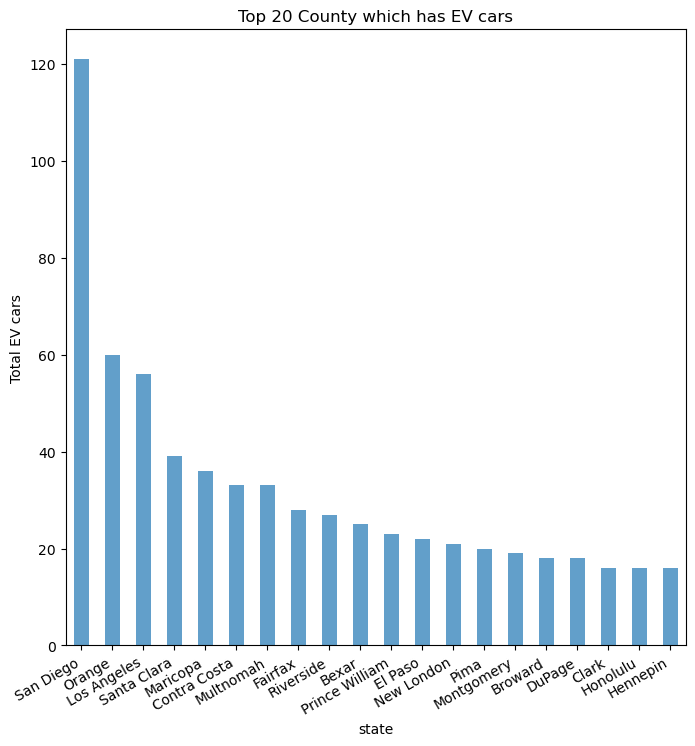

In [94]:
df_clean_sort.plot(kind="bar", xlabel = "state", ylabel = "Total EV cars", title = "Top 20 County which has EV cars", alpha = 0.7, figsize=(8, 8))
plt.xticks(rotation=30, ha='right')
plt.show()